<a href="https://colab.research.google.com/github/jimmy10107/Information-Security-final-homework/blob/main/5_20_%E8%B2%A8%E9%8A%80%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 讀取數據文件
data = pd.read_csv('/content/data(1).csv')


# 打印列名以确认列名是否正确
print("Columns in the dataset:", data.columns)

# 修正列名，去除空格
data.columns = data.columns.str.replace(' ', '_')
print("Columns in the dataset after renaming:", data.columns)

# 確保列是數值類型
columns_to_convert = ['export_USD', 'import_USD', 'US_CPI', 'TW_CPI', 'exchange_rate', 'US_GDP', 'TW_GDP']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 檢查數據類型
print(data.dtypes)

# 檢查是否有缺失值
print("Missing values before dropping:", data.isnull().sum())

# 刪除缺失值
data.dropna(inplace=True)

# 檢查是否所有缺失值已刪除
print("Missing values after dropping:", data.isnull().sum())

# 確保所有列都有數據
print(data.head())

# 創建一個新的列，取每年進口數據的對數值
data['log_import'] = np.log(data['import_USD'])

# 檢查log_import列是否創建成功
print(data[['import_USD', 'log_import']].head())

# 定義自變量和因變量
X = data[['US_CPI', 'TW_CPI', 'exchange_rate', 'US_GDP', 'TW_GDP']]
y = data['log_import']

# 檢查自變量和因變量的維度
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 添加常數項到自變量
X = sm.add_constant(X)

# 再次檢查自變量的維度
print("Shape of X with constant:", X.shape)

# 確認自變量和因變量中沒有零大小的數組
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("No valid data points available for regression.")

# 創建回歸模型
model = sm.OLS(y, X).fit()

# 打印回歸結果
print(model.summary())


Columns in the dataset: Index(['Unnamed: 0', 'US CPI', 'TW CPI', 'export USD', 'import USD',
       'exchange rate', 'US GDP', 'TW GDP'],
      dtype='object')
Columns in the dataset after renaming: Index(['Unnamed:_0', 'US_CPI', 'TW_CPI', 'export_USD', 'import_USD',
       'exchange_rate', 'US_GDP', 'TW_GDP'],
      dtype='object')
Unnamed:_0         int64
US_CPI           float64
TW_CPI           float64
export_USD       float64
import_USD       float64
exchange_rate    float64
US_GDP             int64
TW_GDP             int64
dtype: object
Missing values before dropping: Unnamed:_0        0
US_CPI            0
TW_CPI            0
export_USD       23
import_USD       23
exchange_rate     0
US_GDP            0
TW_GDP            0
dtype: int64
Missing values after dropping: Unnamed:_0       0.0
US_CPI           0.0
TW_CPI           0.0
export_USD       0.0
import_USD       0.0
exchange_rate    0.0
US_GDP           0.0
TW_GDP           0.0
dtype: float64
Empty DataFrame
Columns: [Unname

ValueError: No valid data points available for regression.

Columns in the dataset: Index(['year', 'US_CPI', 'TW_CPI', 'export_USD', 'import_USD', 'exchange_rate',
       'US_GDP', 'TW_GDP'],
      dtype='object')
year               int64
US_CPI           float64
TW_CPI           float64
export_USD         int64
import_USD         int64
exchange_rate    float64
US_GDP             int64
TW_GDP             int64
dtype: object
Missing values before dropping: year             0
US_CPI           0
TW_CPI           0
export_USD       0
import_USD       0
exchange_rate    0
US_GDP           0
TW_GDP           0
dtype: int64
Missing values after dropping: year             0
US_CPI           0
TW_CPI           0
export_USD       0
import_USD       0
exchange_rate    0
US_GDP           0
TW_GDP           0
dtype: int64
   year  US_CPI  TW_CPI  export_USD  import_USD  exchange_rate    US_GDP  \
0  2000    79.0    91.1    35588452    25269878         31.225  18590246   
1  2001    81.2    91.1    28128251    19088599         33.800  18766321   
2  2002    

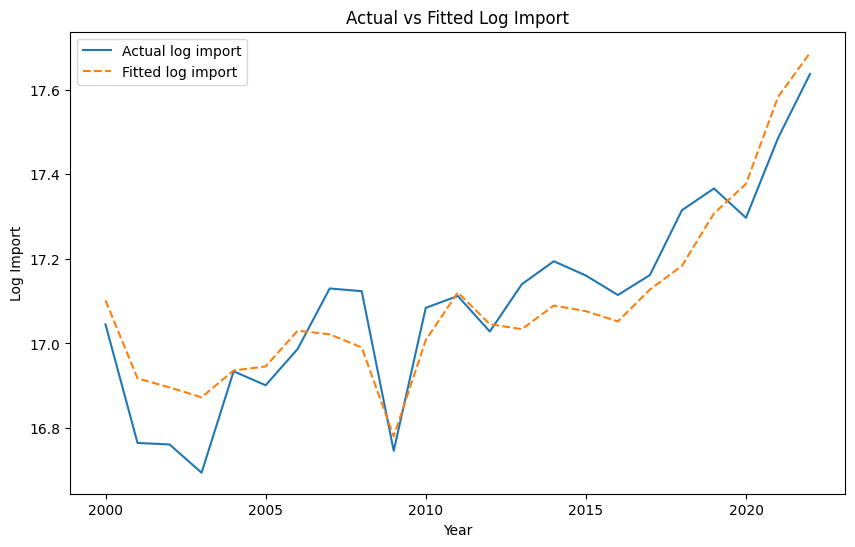

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 建立 DataFrame
data_dict = {
    "year": range(2000, 2023),
    "US_CPI": [79, 81.2, 82.5, 84.4, 86.6, 89.5, 92.4, 95.1, 98.7, 98.4, 100, 103.1, 105.3, 106.8, 108.5, 108.7, 110.1, 112.4, 115.1, 117.2, 118.7, 124.3, 134.2],
    "TW_CPI": [91.1, 91.1, 90.9, 90.7, 92.1, 94.2, 94.8, 96.5, 99.9, 99, 100, 101.4, 103.4, 104.2, 105.4, 105.1, 106.6, 107.3, 108.7, 109.3, 109, 111.2, 114.5],
    "export_USD": [35588452, 28128251, 27373955, 26571270, 28809375, 29162882, 32474639, 32130276, 30883569, 23619884, 31566001, 36450635, 33119861, 32630181, 35033279, 34448479, 33396311, 36772593, 39490380, 46247108, 50549921, 65685966, 75052059],
    "import_USD": [25269878, 19088599, 19020666, 17790159, 22612090, 21878879, 23839305, 27508082, 27333463, 18735649, 26274123, 27025167, 24843729, 27784597, 29337543, 28362487, 27086971, 28395694, 33104900, 34849797, 32513548, 39258764, 45690982],
    "exchange_rate": [31.225, 33.8, 34.575, 34.418, 33.422, 32.167, 32.531, 32.842, 31.517, 33.049, 31.642, 29.464, 29.614, 29.77, 30.368, 31.898, 32.318, 30.439, 30.156, 30.925, 29.578, 28.022, 29.777],
    "US_GDP": [18590246, 18766321, 19028132, 19512215, 20338420, 21080187, 21779492, 22371438, 22580786, 21998785, 22747677, 23264999, 23810105, 24347292, 24880181, 25414810, 25687206, 26243291, 26888116, 27388377, 26454540, 28033939, 28714113],
    "TW_GDP": [306813, 302513, 319095, 332576, 355695, 374844, 396474, 423635, 427020, 420133, 463177, 480194, 490862, 503053, 526793, 534515, 546088, 564171, 579893, 597660, 617901, 658236, 674378]
}

data = pd.DataFrame(data_dict)

# 打印列名以確認列名是否正確
print("Columns in the dataset:", data.columns)

# 確保列是數值類型
columns_to_convert = ['export_USD', 'import_USD', 'US_CPI', 'TW_CPI', 'exchange_rate', 'US_GDP', 'TW_GDP']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 檢查數據類型
print(data.dtypes)

# 檢查是否有缺失值
print("Missing values before dropping:", data.isnull().sum())

# 刪除缺失值
data.dropna(inplace=True)

# 檢查是否所有缺失值已刪除
print("Missing values after dropping:", data.isnull().sum())

# 確保所有列都有數據
print(data.head())

# 創建一個新的列，取每年進口數據的對數值
data['log_import'] = np.log(data['import_USD'])

# 檢查log_import列是否創建成功
print(data[['import_USD', 'log_import']].head())

# 取每年出口數據的對數值作為自變量
data['log_export'] = np.log(data['export_USD'])

# 定義自變量和因變量
X = data[['log_export']]
y = data['log_import']

# 檢查自變量和因變量的維度
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 添加常數項到自變量
X = sm.add_constant(X)

# 再次檢查自變量的維度
print("Shape of X with constant:", X.shape)

# 確認自變量和因變量中沒有零大小的數組
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("No valid data points available for regression.")

# 創建回歸模型
model = sm.OLS(y, X).fit()

# 打印回歸結果
print(model.summary())

# 繪製回歸結果
plt.figure(figsize=(10, 6))
plt.plot(data['year'], y, label='Actual log import')
plt.plot(data['year'], model.predict(X), label='Fitted log import', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Log Import')
plt.legend()
plt.title('Actual vs Fitted Log Import')
plt.show()
